# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor

#Statmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/competition_awards_data.csv')
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


# Part a

In [4]:
df.isna().sum()

Awards        0
Math Score    0
dtype: int64

There are no missing values

# Part b

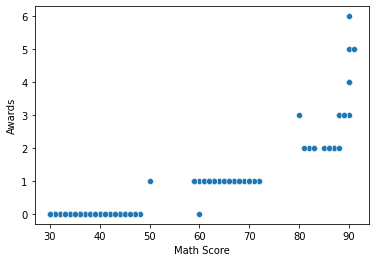

In [5]:
sns.scatterplot(data=df, x="Math Score", y="Awards")

# Part c

In [6]:
X = df["Math Score"]
y = df["Awards"]
X.shape, y.shape

((200,), (200,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160,), (40,))

# Part d

In [8]:
clf_poission = PoissonRegressor()
clf_poission.fit(X_train, y_train)
y_pred_poission = clf_poission.predict(X_test)

In [9]:
print(f'D^2 score of training data: {clf_poission.score(X_train, y_train)}')
print(f'D^2 score of test data: {clf_poission.score(X_test, y_test)}')

D^2 score of training data: 0.8669428123654632
D^2 score of test data: 0.7963462529793037


# Part e

In [10]:
print(f'R2 score: {r2_score(y_test, y_pred_poission)}')

R2 score: 0.8459891766541834


# Part f

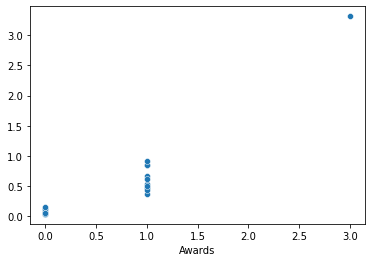

In [17]:
sns.scatterplot(x=y_test, y=y_pred_poission)

I decided to create a dataframe to plot more straight forward.

In [12]:
X_test = X_test.reshape(-1)

In [13]:
df1 = pd.DataFrame(data={'Math Score': X_test, 'Awards': y_test, 'type': 'actual'})
df2 = pd.DataFrame(data={'Math Score': X_test, 'Awards': y_pred_poission, 'type': 'predicted'})
df_plot = pd.concat([df1, df2])
df_plot.head()

,Math Score,Awards,type
95,41,0.0,actual
15,44,0.0,actual
30,35,0.0,actual
158,30,0.0,actual
128,38,0.0,actual


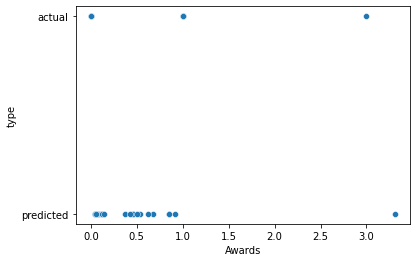

In [16]:
sns.scatterplot(data=df_plot, x="Awards", y="type")